Optimized Alpha for Normal Distribution =  0.01
Optimized Alpha for Exponential Distribution =  0.006
A Train Accuracy:  (88.36363636363636, '%')
B Train Accuracy:  (96.9090909090909, '%')


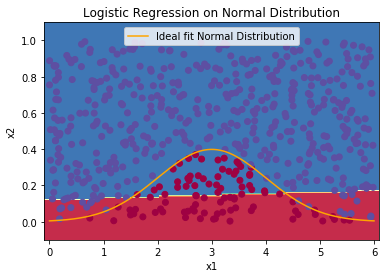

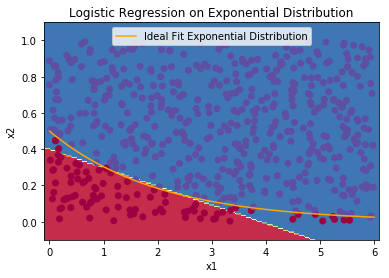

In [2]:
# Marc Garard
# 12/16/18 updated to sample against Normal distribution and exponetial distribution to test the logistic regression
# and to include contour maps of the training result and to use the optimizeAlpha function
from LogisticRegression import *
import matplotlib.pyplot as plt
import math
import scipy.stats

#create data set: X1
x_range, y_range = 6, 1
X1 = np.random.rand(2,550)
X1[0] *= x_range
X1[1] *= y_range

#create data set: Y1
mu, sigma = 3, math.sqrt(1)
Y1, Y2 = [0]*len(X1[0]), [0]*len(X1[0])
for i in range( len(X1[0]) ):
    if X1[1][i] > scipy.stats.norm.pdf(X1[0][i], mu, sigma): Y1[i] = 1
    if X1[1][i] > scipy.stats.expon.pdf(X1[0][i], 0, 2): Y2[i] = 1

# train the data on two sets: a, b
alpha = 0.110
a = LogisticRegression(X1, Y1, alpha = alpha)
a.optimizeAlpha(np.arange(0.002, 1, 0.002), 100)
print('Optimized Alpha for Normal Distribution = ', a.alpha)
b = LogisticRegression(X1, Y2, alpha = alpha)
b.optimizeAlpha(np.arange(0.002, 1, 0.002), 100)
print("Optimized Alpha for Exponential Distribution = ", b.alpha)

a.train(100000)
b.train(100000)
print( 'A Train Accuracy: ', a.trainAccuracy() )
print( 'B Train Accuracy: ', b.trainAccuracy() )


# Set min and max values and give it some padding
x_min, x_max = -0.1, x_range + 0.1
y_min, y_max = -0.1, y_range + 0.1
h = 0.01
    
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z1 = a.predict([xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
Z2 = b.predict([xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

# close the objects
del(a)
del(b)

# Plot the contour and training examples
plt.contourf(xx, yy, Z1, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
xl1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 10000)
plt.plot(xl1, scipy.stats.norm.pdf(xl1, mu, sigma), color = 'orange', label = 'Ideal fit Normal Distribution')
plt.scatter(X1[0], X1[1], c=Y1, cmap=plt.cm.Spectral)
plt.title("Logistic Regression on Normal Distribution")
plt.legend(loc=9)
plt.show()

# Plot the contour and training examples
plt.contourf(xx, yy, Z2, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
xl2 = np.linspace(0, 6, 10000)
plt.plot(xl2, scipy.stats.expon.pdf(xl2, 0, 2), c='orange', label = 'Ideal Fit Exponential Distribution')
plt.scatter(X1[0], X1[1], c=Y2, cmap=plt.cm.Spectral)
plt.title("Logistic Regression on Exponential Distribution")
plt.legend(loc=9)
plt.show()
